# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
%matplotlib notebook

import pandas as pd

def reshape_df(name):
    #indices for each pollutants to convert ppd to ug/m3
    indices = {"CO":1.15, "NO":1.25, "NO2":1.88, "NOX":1.88, "O3":2.00, "SO2":2.62, "PM10":1.0}
    
    #loading dataframe
    df = pd.read_csv("https://raw.githubusercontent.com/ScoutHub/Applied-Data-Science-with-Python-Specialization/master/Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation%20in%20Python/data/Pollution/2019_{}.csv".format(name), index_col = [0], parse_dates=[0]).iloc[:, :-1]
    
    #reframing dataframe
    cat = df.reset_index().iloc[:4, 1:].iloc[2:].transpose()
    
    #selecting datas from 2019
    df = df[df.index.year == 2019].iloc[4:].stack().reset_index().set_index("level_1")
    df = pd.merge(cat, df, right_index = True, left_index = True).reset_index()
    
    #renaming columns
    df.columns = ["Id_loc", "Polluant_Agent", "Units", "Date","Values"]
    
    #convertion date to datetime objects
    df.Date = pd.to_datetime(df.Date.dt.strftime('%d-%m-%Y'))
    
    #convertion all units to ug/m3
    unit = df.Units.unique()[0]
    df.Values = pd.to_numeric(df.Values)*(int(unit == "mg/m3")*1000 + int(unit == "ppd")*indices[name] + int(unit == "microg/m3"))
    df = df.drop(["Units"], axis = 1)
    
    #calculate : mean level for every stations for PM10, max level for the rest of pollutants (according to ATMO indexe calculation rule)
    df = df.groupby(["Date","Id_loc", "Polluant_Agent"]).mean() if name == "PM10" else df.groupby(["Date","Id_loc", "Polluant_Agent"]).max()
    return df.reset_index().set_index("Date")

#loading all pollutants dataframe into one
df = pd.concat([reshape_df(agent) for agent in ["NO2", "O3", "PM10", "SO2"]]).sort_index()

#selecting datas from stations within Paris area excluding stations near traffic (according to ATMO indexe calculation rule)
wanted_location = ['Tour_Eiffel_3ème_étage', 'Paris_Centre', 'Quai_des_Célestins',"Place_de_l'Opéra", 'Paris_stade_Lenglen', 
                   'PARIS_7ème', 'PARIS_18ème', 'PARIS_13ème', 'PARIS_12ème', 'PARIS_1er_Les_Halles']
df = df[df.Id_loc.isin(wanted_location)]

df

,Id_loc,Polluant_Agent,Values
Date,,,
2019-01-01,PARIS_18ème,PM10,18.552632
2019-01-01,Paris_Centre,PM10,17.421053
2019-01-01,Paris_stade_Lenglen,PM10,15.157895
2019-01-01,Place_de_l'Opéra,PM10,20.136842
2019-01-01,Tour_Eiffel_3ème_étage,SO2,1.600000
2019-01-01,PARIS_13ème,O3,57.700000
2019-01-01,PARIS_18ème,O3,36.500000
2019-01-01,Paris_Centre,O3,56.500000
2019-01-01,Tour_Eiffel_3ème_étage,O3,68.400000


In [2]:
#calculate : mean level per day of the year 2019
df = df.reset_index().groupby(["Date", "Polluant_Agent"]).mean().reset_index()

#reshaping dataframe into two dimension arrays (pollutants as columns, date as indexes) for easy plotting
df = pd.pivot_table(df, index=["Date"], columns = ["Polluant_Agent"], values = "Values")

<IPython.core.display.Javascript object>


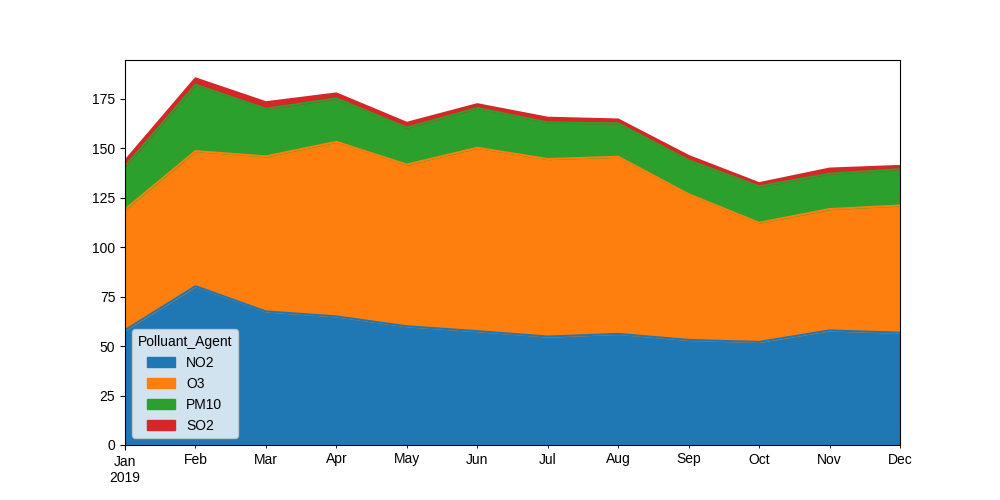

In [3]:
#plotting area lines
import matplotlib.pyplot as plt

#calculate : mean level per month of the year 2019
dfm = df.copy()
dfm.index = pd.to_datetime(dfm.index.strftime('%b-%Y'))
dfm = dfm.groupby(level = 0).mean()
dfm.plot(kind = "area", figsize = (10, 5))

<IPython.core.display.Javascript object>


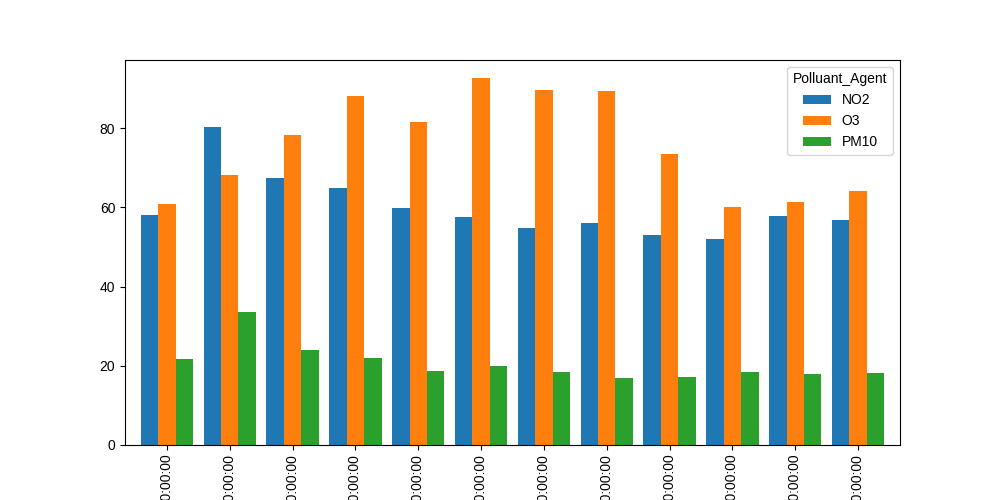

In [4]:
#plotting bar chart
dfm.drop(['SO2'], axis=1).plot(kind = "bar", figsize = (10, 5), width=(10/12))

In [7]:
#loading weather dataframe
weather = pd.read_csv("https://raw.githubusercontent.com/ScoutHub/Applied-Data-Science-with-Python-Specialization/master/Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation%20in%20Python/data/Pollution/export-paris2019.csv", skiprows = 3, usecols=["DATE", "MAX_TEMPERATURE_C", "MIN_TEMPERATURE_C", "WINDSPEED_MAX_KMH", "PRECIP_TOTAL_DAY_MM", "HUMIDITY_MAX_PERCENT"], index_col = [0], parse_dates=[0])
weather = weather.apply(pd.to_numeric)

#calculate: average temperature per day
weather["MOY_TEMPERATURE_C"] = (weather["MAX_TEMPERATURE_C"] + weather["MIN_TEMPERATURE_C"])/2

#merging pollutants date frame with weather dataframe with date as key index
dfmerge = pd.merge(df, weather, right_index = True, left_index = True)

<IPython.core.display.Javascript object>


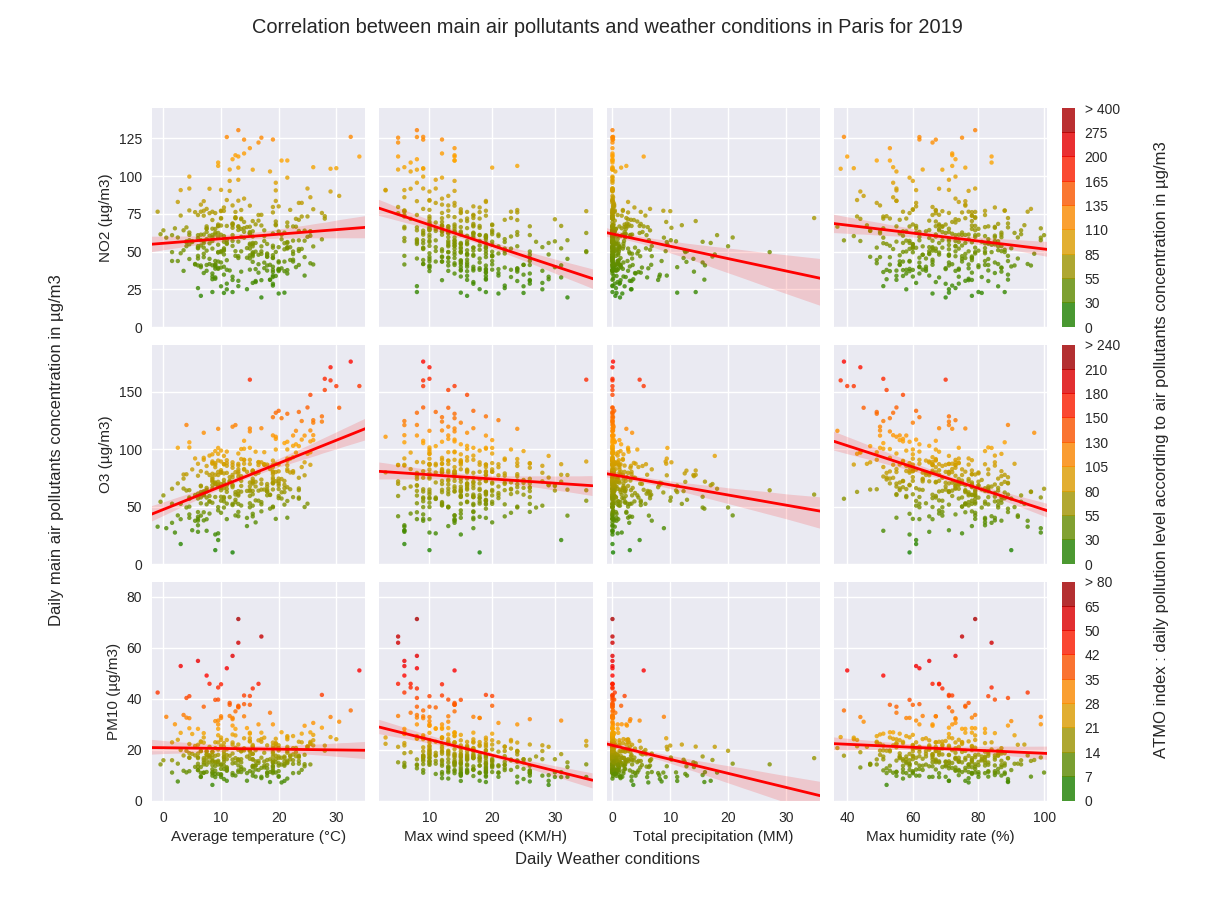

In [8]:
import seaborn as sns
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

#selecting main pollutants according to plot 1
plot_polluant = ["NO2", "O3", "PM10"]

#selecting weather conditions
plot_weather = ["MOY_TEMPERATURE_C", "WINDSPEED_MAX_KMH", "PRECIP_TOTAL_DAY_MM", "HUMIDITY_MAX_PERCENT"]
labels_x = ["Average temperature (°C)", "Max wind speed (KM/H)", "Total precipitation (MM)", "Max humidity rate (%)"]
labels_y = ["NO2 (µg/m3)", "O3 (µg/m3)", "PM10 (µg/m3)"]

#ATMO indexes for each pollutants in ug/m3 from https://www.airparif.asso.fr/reglementation/indice-qualite-air-francais
colors = {"NO2": [0, 30, 55, 85, 110, 135, 165, 200, 275, 400], 
          "O3": [0, 30, 55, 80, 105, 130, 150, 180, 210, 240], 
          "PM10":[0, 7, 14, 21, 28, 35, 42, 50, 65, 80], 
          "SO2":[0, 40, 80, 120, 160, 200, 250, 300, 400, 500]}

#calculate : number or rows and columns for subplot (pollutatns as rows, weather conditions as columns)
rows = int(len(plot_polluant))
cols = int(len(plot_weather)) + 1
fig, ax = plt.subplots(rows, cols, figsize = (3*(cols -1) +0.15 , 3*rows), sharex='col', sharey='row', 
                       gridspec_kw = {"wspace":0.08, "hspace":0.08, "width_ratios":[1] * (cols -1) + [0.15]})

#drawing the subplot
for row, polluant in enumerate(plot_polluant):
    r1, r2, maxm = colors[polluant][4], colors[polluant][7], colors[polluant][9]
    dfpol = dfmerge[polluant]
    
    #colormap of ATMO indexes
    cmap = mcolors.LinearSegmentedColormap.from_list(polluant,[(0.0, "g"), (r1/maxm, "orange"), (r2/maxm, "r"), (1.0, "darkred")])
    
    for col, weath in enumerate(plot_weather):
        
        #plotting of seaborn regplot
        out = sns.regplot(dfmerge[weath], dfpol, ax = ax[row, col],
                    scatter_kws={"s": 10, "color":None, "c":dfpol, "vmin":0, "vmax":maxm, "cmap":cmap},
                   line_kws={"color":'red', "linewidth":2})
        
        #labels and ticks
        if row != rows - 1: ax[row, col].xaxis.label.set_visible(False)
        if col != 0: ax[row, col].yaxis.label.set_visible(False) 
        ax[row, col].set_ylim([0,int(dfpol.max())+15])
        ax[row, col].set_xlim([dfmerge[weath].min()-1,dfmerge[weath].max()+1])
        ax[row, col].set_xlabel(labels_x[col])
        ax[row, col].set_ylabel(labels_y[row])
        ax[row, col].grid(True)

    #plotting of colorbar ATMO indexes per pollutants on the right side of the subplot
    divider = make_axes_locatable(ax[row, cols-1])
    cax = divider.append_axes("left", size="100%", pad=0.05)
    fig.add_axes(cax)
    cbar = fig.colorbar(out.get_children()[0], boundaries = colors[polluant], cax=cax)
    colorsticks = [str(tick) for tick in colors[polluant]]
    colorsticks[-1] = "> " + colorsticks[-1]
    cbar.ax.set_yticklabels(colorsticks)
    fig.delaxes(ax[row, cols-1])

#labels and tilte of the figure
fig.suptitle('Correlation between main air pollutants and weather conditions in Paris for 2019')
fig.text(0.5, 0.04, "Daily Weather conditions", ha='center')
fig.text(0.04, 0.5, "Daily main air pollutants concentration in µg/m3", va='center', rotation='vertical')
fig.text(0.95, 0.5, "ATMO index : daily pollution level according to air pollutants concentration in µg/m3", va='center', rotation='vertical')

#Add non-transparent background for PNG export
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1) # this makes it non‐transparent